In [2]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\gnpit\BME574`


In [3]:
Pkg.add(["CairoMakie","LinearAlgebra","Distributions","Convex","SCS"])

   Resolving package versions...
  No Changes to `C:\Users\gnpit\BME574\Project.toml`
  No Changes to `C:\Users\gnpit\BME574\Manifest.toml`


In [5]:
using CairoMakie, LinearAlgebra, Convex, SCS, Random, Statistics

In [188]:
x = LinRange(-2, 4, 100)  
y = x .^ 2 

100-element Vector{Float64}:
  4.0
  3.7612488521579435
  3.5298438934802565
  3.3057851239669427
  3.089072543617998
  2.8797061524334255
  2.6776859504132235
  2.483011937557392
  2.295684113865932
  2.115702479338843
  1.9430670339761251
  1.7777777777777777
  1.6198347107438016
  ⋮
 11.111111111111109
 11.518824609733702
 11.933884297520658
 12.356290174471996
 12.786042240587694
 13.22314049586777
 13.667584940312215
 14.119375573921026
 14.578512396694217
 15.044995408631774
 15.5188246097337
 16.0

In [190]:
fig_real = Figure(resolution = (1000, 500))
ax = Axis(fig_real[1,1], title="Plot of y = x^2", xlabel="x", ylabel="x^2")

Axis with 0 plots:


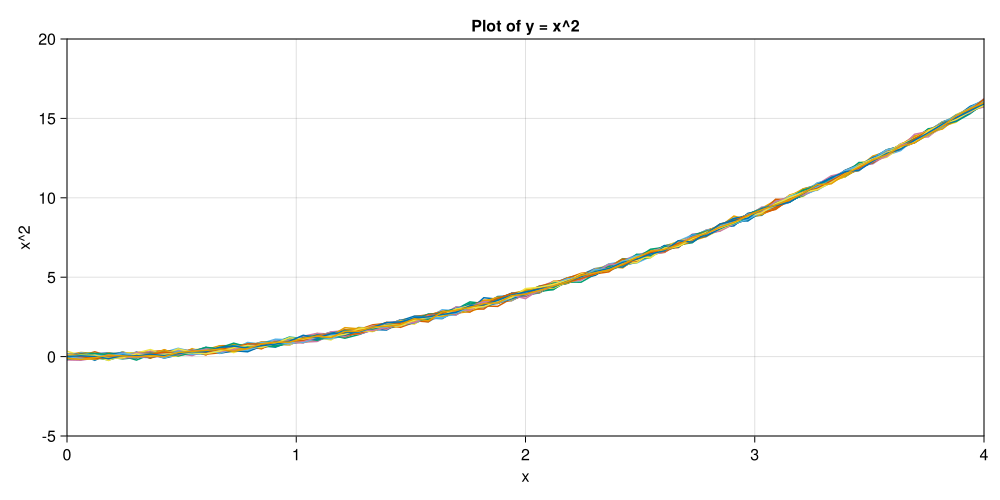

In [192]:
for _ in 1:100
    y_noisy = y .+ 0.1*randn(n)   # Add N(0, sigma) to the function
    lines!(ax, x, y_noisy)
end

xlims!(ax, 0, 4)
ylims!(ax, -5, 20)
fig_real

In [194]:
A = hcat([x .^ d for d in 0:19]...)

100×20 Matrix{Float64}:
 1.0  -2.0       4.0      -8.0      …  262144.0         -524288.0
 1.0  -1.93939   3.76125  -7.29454          1.50657e5        -2.92183e5
 1.0  -1.87879   3.52984  -6.63183      85074.5         -159837.0
 1.0  -1.81818   3.30579  -6.01052      47148.9          -85725.3
 1.0  -1.75758   3.08907  -5.42928      25612.6          -45016.0
 1.0  -1.69697   2.87971  -4.88677  …   13618.6          -23110.4
 1.0  -1.63636   2.67769  -4.38167       7076.8          -11580.2
 1.0  -1.57576   2.48301  -3.91262       3587.64          -5653.26
 1.0  -1.51515   2.29568  -3.47831       1770.96          -2683.28
 1.0  -1.45455   2.1157   -3.07739        849.359         -1235.43
 1.0  -1.39394   1.94307  -2.70852  …     394.812          -550.344
 1.0  -1.33333   1.77778  -2.37037        177.377          -236.503
 1.0  -1.27273   1.61983  -2.06161         76.7779          -97.7173
 ⋮                                  ⋱                   
 1.0   3.33333  11.1111   37.037            2

In [196]:
ls_coeff = zeros(20, 100)  
lasso_coeff = zeros(20, 100)  
ls_error = zeros(100)
lasso_error = zeros(100)

100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [198]:
function fitlq(A, y)
    Ainv = pinv(A)
    return Ainv * y
end

fitlq (generic function with 1 method)

In [200]:
function lasso(A, y, λ)
    x_lasso = Variable(size(A, 2))  
    problem = minimize(norm(A * x_lasso - y, 2) + λ * norm(x, 1))  
    solve!(problem, SCS.Optimizer; silent=true)
    return vec(evaluate(x_lasso))  
end

lasso (generic function with 1 method)

In [202]:
for i in 1:100
    y_noisy = y .+ 0.1*randn(n)  
    ls_coeff[:, i] = fitlq(A, y_noisy)
    ls_pred = A * ls_coeff[:, i]
    ls_error[i] = norm(y - ls_pred) / norm(y)
    
    lasso_coeff[:, i] = lasso(A, y_noisy, 0.1)
    lasso_pred = A * lasso_coeff[:, i]
    lasso_error[i] = norm(y - lasso_pred) / norm(y)
end

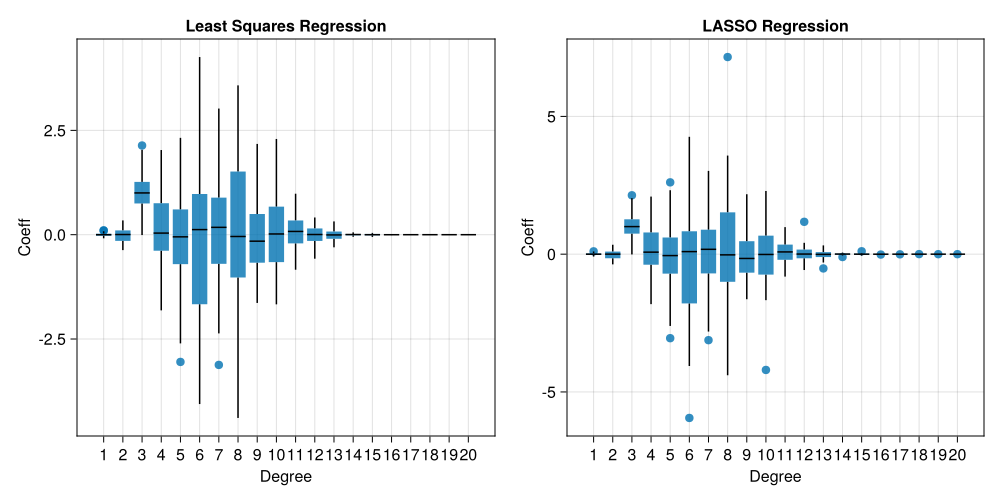

In [203]:
fig_Coeff = Figure(resolution = (1000, 500))

ax_ls = Axis(fig_Coeff[1, 1], title = "Least Squares Regression", ylabel = "Coeff", xlabel = "Degree", xticks=1:1:20)
boxplot!(ax_ls, repeat(1:20, 100), vec(ls_coeff))

ax_lasso = Axis(fig_Coeff[1, 2], title = "LASSO Regression", ylabel = "Coeff", xlabel = "Degree", xticks=1:1:20)
boxplot!(ax_lasso, repeat(1:20, 100), vec(lasso_coeff))

fig_Coeff

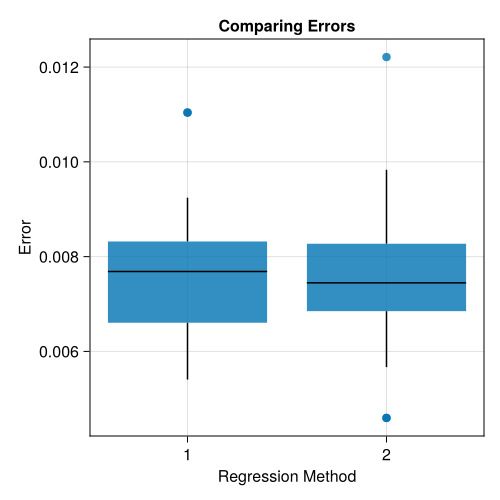

In [204]:
fig_errors = Figure(resolution = (500, 500))

ax_errors = Axis(fig_errors[1,1], xlabel="Regression Method", ylabel="Error", title="Comparing Errors", xticks=1:1:2)
boxplot!(ax_errors, repeat([1,2], 100), [ls_error; lasso_error])

fig_errors